In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

In [3]:
df_airline=pd.read_csv(r'C:\Users\Admin\Downloads\airline_passengers.csv')

In [5]:
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [9]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [11]:
df_airline.dropna(axis=0, inplace=True)

In [13]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [15]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [17]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [19]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [21]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [23]:
df_airline.set_index('Month', inplace=True)

In [25]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


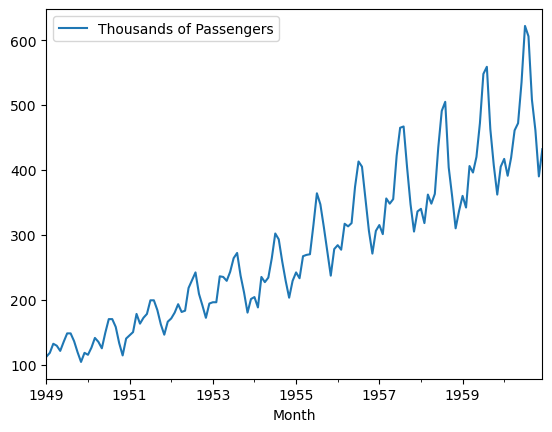

In [37]:
df_airline.plot()
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller

In [41]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Stats :{}'.format(result[0]))
    print('p-value {}'.format(result[1]))

    if result[1]<= 0.05:
        print("stationary")
    else:
        print("non stationary")
    

In [43]:
adf_test(df_airline['Thousands of Passengers'])

ADF Stats :0.8153688792060597
p-value 0.9918802434376411
non stationary


In [55]:
## Use Differencing technique 

df_airline['Passengers first Differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [57]:
df_airline.head()

,Thousands of Passengers,Passengers second Differencing,Passengers first Differencing
Month,,,
1949-01-01,NaN,NaN,NaN
1949-02-01,6.0,NaN,NaN
1949-03-01,14.0,8.0,8.0
1949-04-01,-3.0,-17.0,-17.0
1949-05-01,-8.0,-5.0,-5.0


In [59]:
adf_test(df_airline['Passengers first Differencing'].dropna())

ADF Stats :-16.384231542468527
p-value 2.732891850014085e-29
stationary


In [61]:
df_airline['Passengers second Differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [63]:
adf_test(df_airline['Passengers second Differencing'].dropna())

ADF Stats :-16.384231542468527
p-value 2.732891850014085e-29
stationary


Strong evidence against the null hypothesis reject the null hypothesis. data has no unit root and is stationary

In [95]:
### 12 months 
## Use Techniques Differencing

df_airline['Passengers 12 Differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)


In [97]:
adf_test(df_airline['Passengers 12 Differencing'].dropna())

ADF Stats :-15.595618083746338
p-value 1.856511600123444e-28
stationary


In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

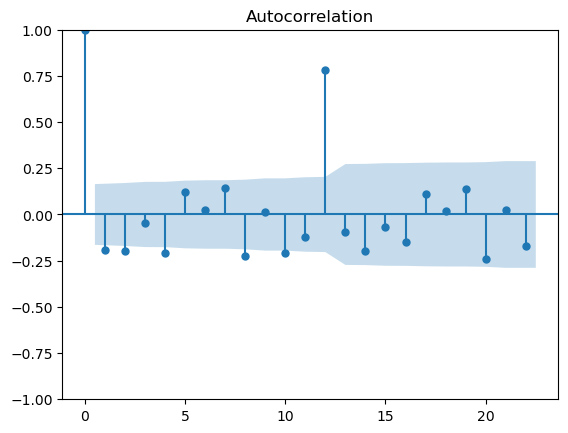

In [101]:
acf=plot_acf(df_airline['Passengers second Differencing'].dropna())
plt.show()

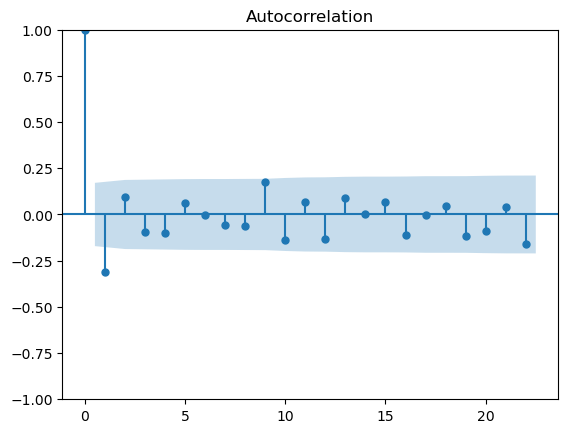

In [112]:
acf12=plot_acf(df_airline['Passengers 12 Differencing'].dropna())
plt.show()

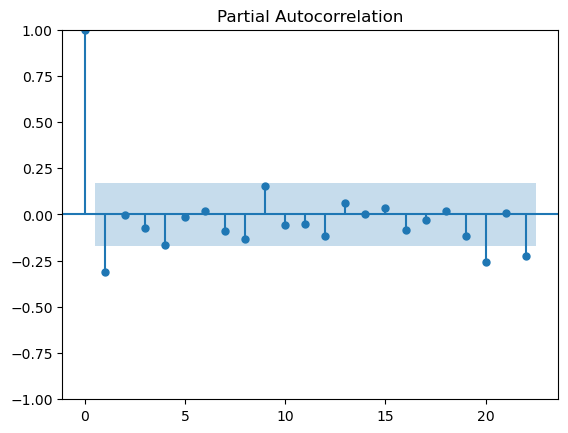

In [114]:
pacf12=plot_pacf(df_airline['Passengers 12 Differencing'].dropna())
plt.show()

In [116]:
df_airline

,Thousands of Passengers,Passengers second Differencing,Passengers first Differencing,Passengers 12 Differencing
Month,,,,
1949-01-01,NaN,NaN,NaN,NaN
1949-02-01,6.0,NaN,NaN,NaN
1949-03-01,14.0,8.0,8.0,NaN
1949-04-01,-3.0,-17.0,-17.0,NaN
1949-05-01,-8.0,-5.0,-5.0,NaN
...,...,...,...,...
1960-08-01,-16.0,-103.0,-103.0,-27.0
1960-09-01,-98.0,-82.0,-82.0,-2.0
1960-10-01,-47.0,51.0,51.0,9.0


In [120]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [122]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [124]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [126]:
test_data

,Thousands of Passengers,Passengers second Differencing,Passengers first Differencing,Passengers 12 Differencing
Month,,,,
1956-01-01,6.0,-35.0,-35.0,-7.0
1956-02-01,-7.0,-13.0,-13.0,2.0
1956-03-01,40.0,47.0,47.0,6.0
1956-04-01,-4.0,-44.0,-44.0,-6.0
1956-05-01,5.0,9.0,9.0,4.0
1956-06-01,56.0,51.0,51.0,11.0
1956-07-01,39.0,-17.0,-17.0,-10.0
1956-08-01,-8.0,-47.0,-47.0,9.0
1956-09-01,-50.0,-42.0,-42.0,-15.0


In [134]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA


In [141]:
from statsmodels.tsa.arima.model import ARIMA


In [143]:
train_data

,Thousands of Passengers,Passengers second Differencing,Passengers first Differencing,Passengers 12 Differencing
Month,,,,
1949-01-01,NaN,NaN,NaN,NaN
1949-02-01,6.0,NaN,NaN,NaN
1949-03-01,14.0,8.0,8.0,NaN
1949-04-01,-3.0,-17.0,-17.0,NaN
1949-05-01,-8.0,-5.0,-5.0,NaN
...,...,...,...,...
1955-08-01,-17.0,-66.0,-66.0,-8.0
1955-09-01,-35.0,-18.0,-18.0,-1.0
1955-10-01,-38.0,-3.0,-3.0,-8.0


In [150]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10,2,0))
model_fit = model_ARIMA.fit()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [155]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -379.719
Date:                     Tue, 08 Apr 2025   AIC                            781.437
Time:                             23:19:48   BIC                            807.911
Sample:                         01-01-1949   HQIC                           792.066
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2029      0.147     -8.181      0.000      -1.491      -0.915
ar.L2         -1.4287      0.271     -5.280      0.000      -1.959      -0.898
ar.L3         -1.3261      0.372     -3.562      0.000      -2.056      -0.596
ar.L4         -1.2891      0.397     -3.244      0.001      -2.068      -0.510
ar.L5         -0.8674      0.433     -2.001      0.045      -1.717      -0.018
ar.L6         -0.4427      0.497     -0.890      0.374      -1.418       0.532
ar.L7          0.0188      0.483      0.039      0.969      -0.929       0.966
ar.L8          0.0719      0.398      0.181      0.857      -0.708       0.852
ar.L9          0.2890      0.316      0.914      0.361      -0.331       0.909
ar.L10         0.1218      0.183      0.666      0.506      -0.237       0.480
sigma2       548.9549     92.148      5.957      0.000     368.347     729.562
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.52   Prob(JB):                         0.57
Heteroskedasticity (H):               3.62   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [159]:
pred=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [161]:
residuals

Month
1956-01-01     -0.644833
1956-02-01     28.556137
1956-03-01     76.740961
1956-04-01     42.635690
1956-05-01     44.342255
1956-06-01     70.684562
1956-07-01     47.329899
1956-08-01     34.036304
1956-09-01     -7.319896
1956-10-01      8.905704
1956-11-01     26.946169
1956-12-01     67.025327
1957-01-01     44.324325
1957-02-01     35.355665
1957-03-01    114.418765
1957-04-01     59.327122
1957-05-01     79.555219
1957-06-01    124.893960
1957-07-01     96.685868
1957-08-01     69.070767
1957-09-01      6.230307
1957-10-01     23.973756
1957-11-01     43.682246
1957-12-01    108.059606
1958-01-01     78.722678
1958-02-01     58.524539
1958-03-01    129.968501
1958-04-01     78.576135
1958-05-01    114.808361
1958-06-01    166.514251
1958-07-01    149.116161
1958-08-01    111.601392
1958-09-01     -0.705158
1958-10-01     62.433448
1958-11-01     63.663827
1958-12-01    138.779703
1959-01-01    133.665170
1959-02-01     95.808545
1959-03-01    180.512383
1959-04-01    111.5

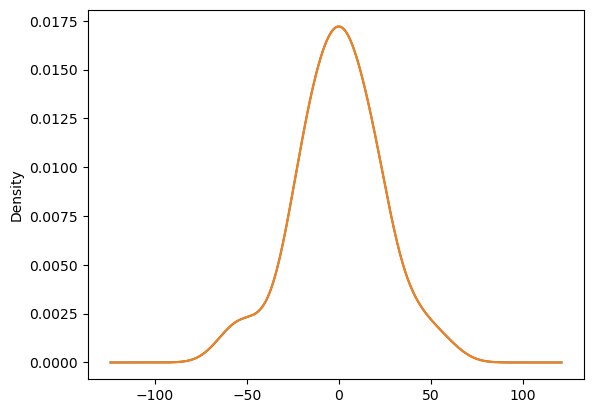

In [165]:
model_fit.resid.plot(kind='kde')
plt.show()